<a href="https://colab.research.google.com/github/alessiomodonesi/Python-Exercises/blob/main/ai/lab11/Solutions_Intelligenza_Artificiale_Lab11_extra_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EXERCISE 1: Design, Train and Test a CNN

Create a CNN using Keras library with the followings specifications:

> __QUESTION 1(a):__  DATASET: Load the [CIFAR10](https://keras.io/api/datasets/cifar10/) dataset contains 60,000 color images in 10 classes, with 6,000 images in each class.
You can use the function datasets.cifar10.load_data() to load the dataset after importing the keras dataset with the command: from tensorflow.keras import datasets. Split the dataset in train and test set

> __QUESTION 1(b):__  Plot some samples in the dataset to visualize the kind of data

> __QUESTION 1(c):__  Build and compile a CNN model composed with:
* Conv2D with 32 filters, kernel size 3X3, activation function relu
* MaxPooling 2D with kernel size 2x2
* Conv2D with 64 filters kernel size 3X3, activation function relu
* MaxPooling 2D with kernel size 2x2
* Conv2D with 64 filters kernel size 3X3, activation function relu
* Flatten layer
* Dense layer with 64 neurons and activation function relu
* Final Dense layer for returning 10 classes
* adam as optmizer


> __QUESTION 1(d):__ Train and test on the CIFAR10 dataset with 10 epochs to check the performance

> __QUESTION 1(e):__ Compute the confusion matrix

> __QUESTION 1(f):__ : Test your model on new images about the available class that you can download from the web.

## SOLUTIONS

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import datasets
from tensorflow.keras import models
from tensorflow.keras import utils
import matplotlib.pyplot as plt
import numpy as np


**NB: Use the GPU to faciliate the training. Check that the Colab is set to work with GPU. How? Runtime menu --> Change runtime type --> Select GPU --> it is ok the default T4.**

In [ ]:
# The following lines allows to exploit the GPU and make the training faster (Check in the Runtime - Change Runtime time if the GPU is set)
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
# QUESTION 1(a) Load the CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


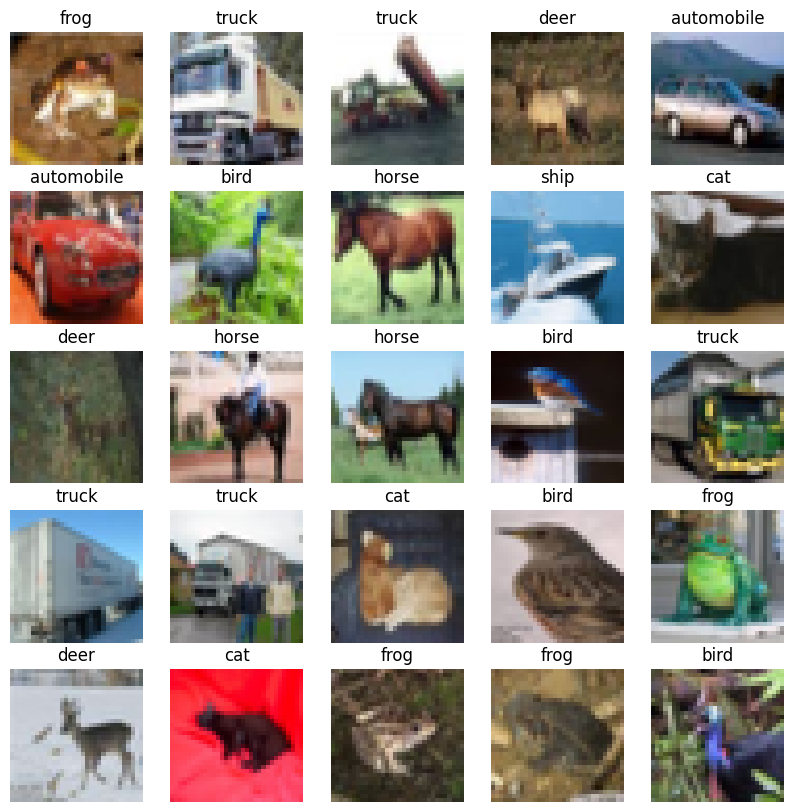

In [ ]:
# QUESTION 1(b) Plot some samples to visualize example of data

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i].astype("uint8"))
    plt.title(class_names[int(y_train[i])])
    plt.axis("off")


In [ ]:
# Pre-proceesing : Standardizing the data --> the values are in the range [0,1]
x_train=x_train/255.0
x_test=x_test/255.0

print('Min in training set:', x_train.min())
print('Max in training set:', x_train.max())

print('Min in test set:', x_test.min())
print('Max in test set:', x_test.max())


Min in training set: 0.0
Max in training set: 1.0
Min in test set: 0.0
Max in test set: 1.0


In [ ]:
# QUESTION 1(c) - PartA Build the CNN model according to the specifications
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), 1, activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

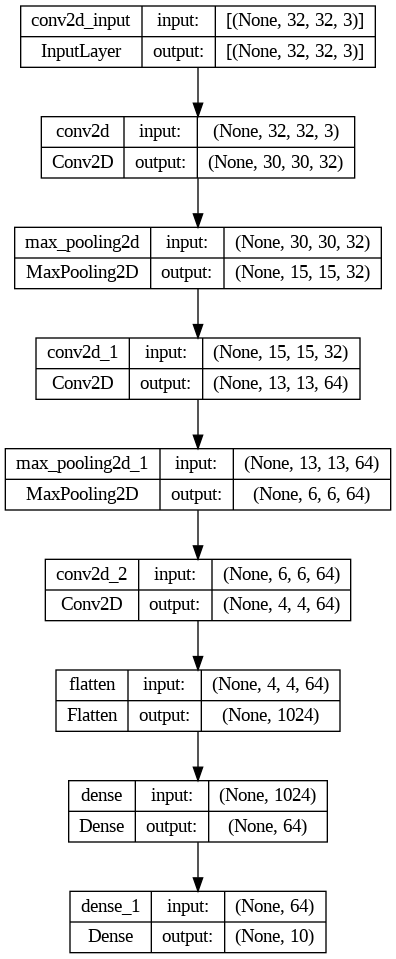

In [ ]:
model.summary()
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# QUESTION 1(c) - PartB Compile the CNN model according to the specifications
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#QUESTION 1(d): Train and test on the CIFAR10 dataset with 10 epochs to check the performance
history = model.fit(x_train, y_train, epochs=10)

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Test model
y_predicted = model.predict(x_test)
y_predicted = np.argmax(y_predicted, axis=1)

Epoch 1/10
1563/1563 [==============================] - 18s 5ms/step - loss: 1.5421 - accuracy: 0.4348
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1732 - accuracy: 0.5852
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0180 - accuracy: 0.6447
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9162 - accuracy: 0.6791
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8450 - accuracy: 0.7045
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7857 - accuracy: 0.7250
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7386 - accuracy: 0.7409
Epoch 8/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.7021 - accuracy: 0.7542
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6624 - accuracy: 0.7673
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.63

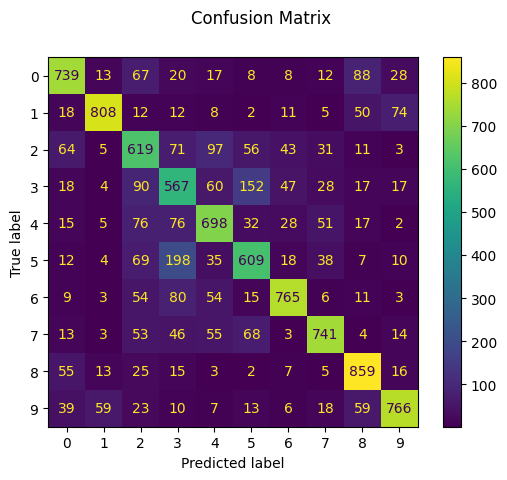

0  - Number of samples of class  airplane  is:  1000
1  - Number of samples of class  automobile  is:  1000
2  - Number of samples of class  bird  is:  1000
3  - Number of samples of class  cat  is:  1000
4  - Number of samples of class  deer  is:  1000
5  - Number of samples of class  dog  is:  1000
6  - Number of samples of class  frog  is:  1000
7  - Number of samples of class  horse  is:  1000
8  - Number of samples of class  ship  is:  1000
9  - Number of samples of class  truck  is:  1000


In [ ]:
#QUESTION 1(e): Compute the confusion matrix

from sklearn import metrics
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predicted)
disp.figure_.suptitle("Confusion Matrix")
print("\n")
plt.show()

for c in range(10):
 x = np.where(y_test == c)
 print(c, ' - Number of samples of class ', class_names[c], ' is: ', len(x[0]))


From the confusion matrix, we expect that the model will have worse performance in the case of the class 2 (bird), class 3 (cat) and class 5 (dog). Let's see with new images what happens.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Downloading...
From: https://drive.google.com/uc?id=1WTXIeWjoXwDgw2NGygAe11TRHpz4Y0cT
To: /content/img.jpg
100%|██████████| 1.25M/1.25M [00:00<00:00, 114MB/s]


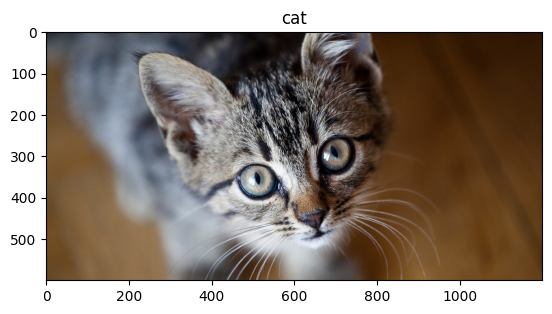

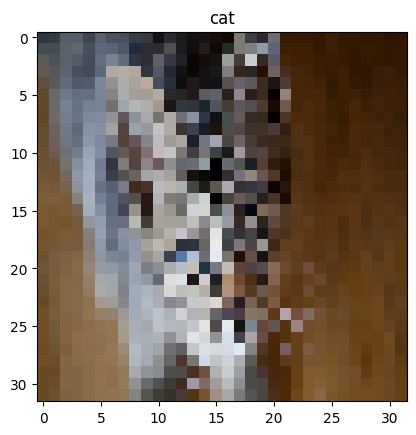

1/1 [==============================] - 0s 123ms/step

 PREDICTED LABEL: cat


Downloading...
From: https://drive.google.com/uc?id=1GlYCU3N4WqqIrIcC9V_1EtjNOYijWUsW
To: /content/img.jpg
100%|██████████| 87.5k/87.5k [00:00<00:00, 97.1MB/s]


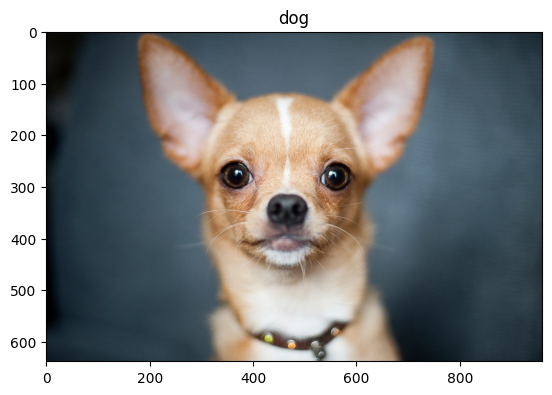

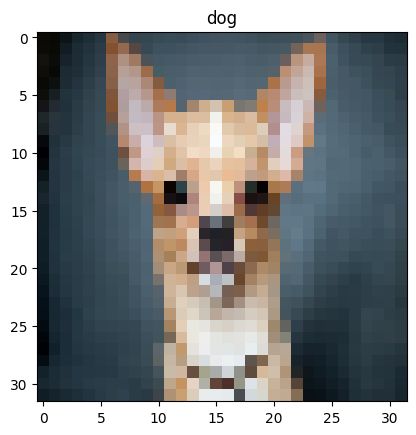

1/1 [==============================] - 0s 21ms/step

 PREDICTED LABEL: dog


Downloading...
From: https://drive.google.com/uc?id=14yYM5lYd6xug6_P3y3x96qeN0I7e5lsw
To: /content/img.jpg
100%|██████████| 25.9k/25.9k [00:00<00:00, 15.4MB/s]


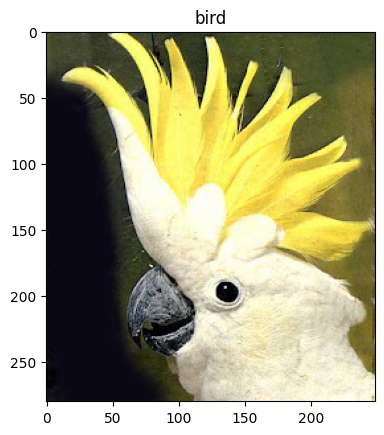

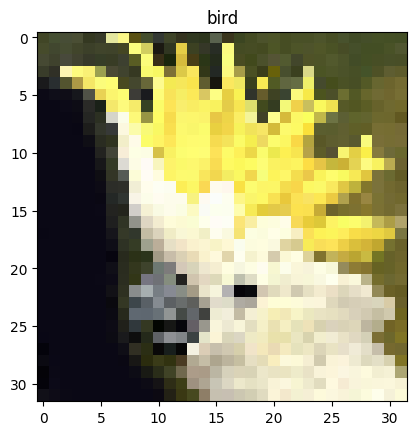

1/1 [==============================] - 0s 20ms/step

 PREDICTED LABEL: deer


Downloading...
From: https://drive.google.com/uc?id=1eWSdGzzB089nXwaj9BLurPXKTHK2mULg
To: /content/img.jpg
100%|██████████| 125k/125k [00:00<00:00, 30.4MB/s]


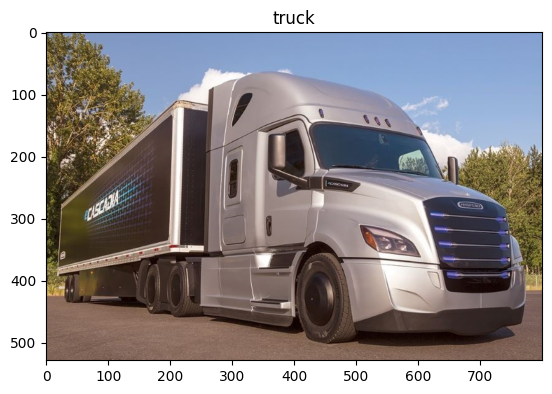

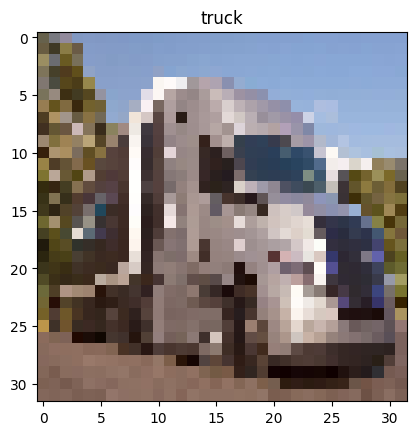

1/1 [==============================] - 0s 20ms/step

 PREDICTED LABEL: truck


Downloading...
From: https://drive.google.com/uc?id=1ato5-H1uJm1ET95hIdnh6O8F3kplxkEy
To: /content/img.jpg
100%|██████████| 14.1k/14.1k [00:00<00:00, 19.5MB/s]


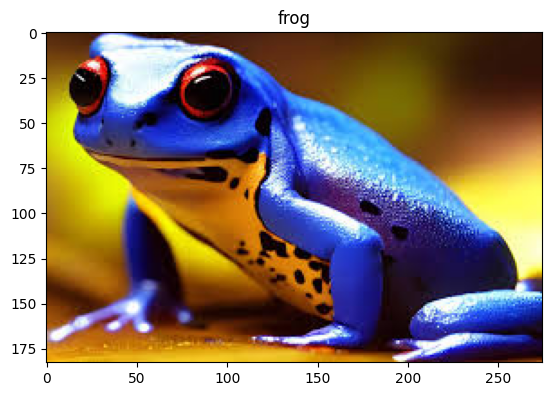

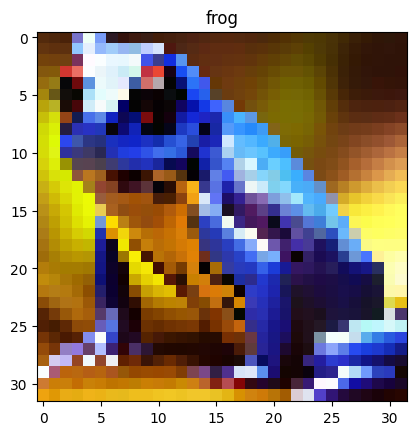

1/1 [==============================] - 0s 28ms/step

 PREDICTED LABEL: automobile


Downloading...
From: https://drive.google.com/uc?id=1B6ocPfCNxTX5aq8CCM196NuOFgxhX-if
To: /content/img.jpg
100%|██████████| 78.9k/78.9k [00:00<00:00, 47.0MB/s]


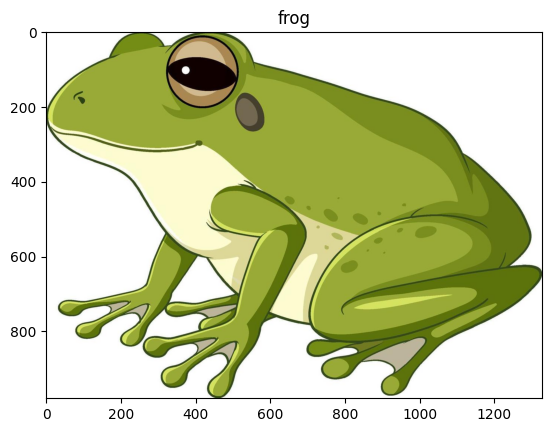

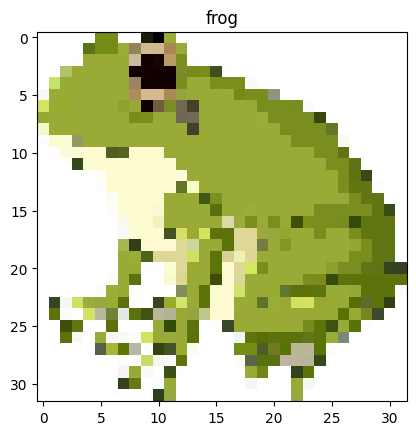

1/1 [==============================] - 0s 26ms/step

 PREDICTED LABEL: frog


Downloading...
From: https://drive.google.com/uc?id=1Q73FXbnG5EiKMNkjnfzbCUjBeVtzlz3i
To: /content/img.jpg
100%|██████████| 9.85k/9.85k [00:00<00:00, 27.2MB/s]


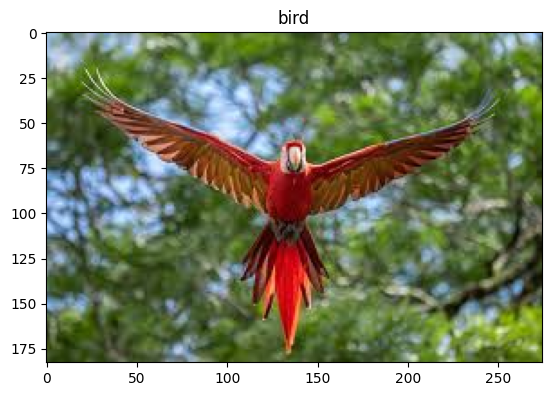

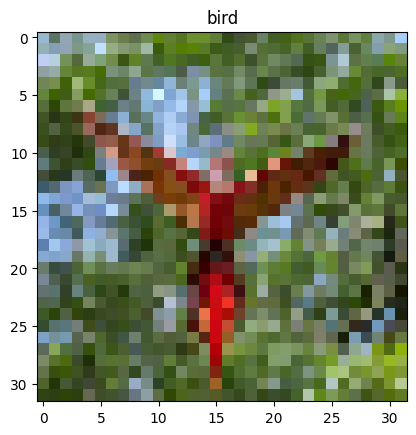

1/1 [==============================] - 0s 33ms/step

 PREDICTED LABEL: frog


Downloading...
From: https://drive.google.com/uc?id=11EKbn0jlXNvHmXMRHLrOA0xgQq7a_Gph
To: /content/img.jpg
100%|██████████| 165k/165k [00:00<00:00, 75.6MB/s]


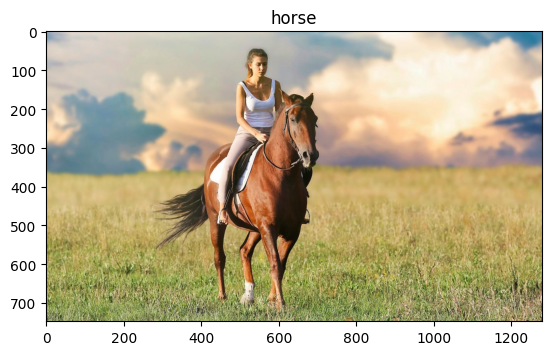

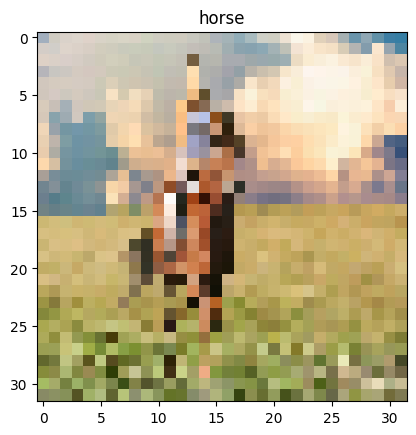

1/1 [==============================] - 0s 19ms/step

 PREDICTED LABEL: horse


Downloading...
From: https://drive.google.com/uc?id=1xVWmXw_BWIGpphw055JovE78ZQGrDYyZ
To: /content/img.jpg
100%|██████████| 57.5k/57.5k [00:00<00:00, 89.1MB/s]


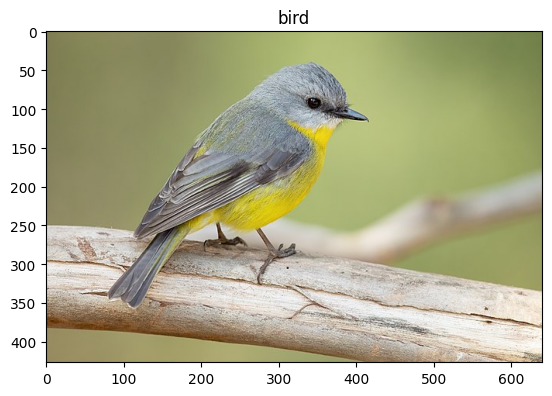

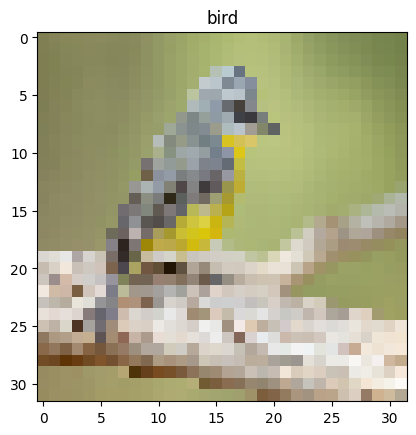

1/1 [==============================] - 0s 21ms/step

 PREDICTED LABEL: bird


In [ ]:
#QUESTION 1(f):Test your model on new images about the available class that you can download from the web
!pip install gdown
import gdown
import cv2

# new images : NB as explained during the lecture, you can retrieve the id from the shared link in drive
images_url = ["https://drive.google.com/uc?id=1WTXIeWjoXwDgw2NGygAe11TRHpz4Y0cT",
              "https://drive.google.com/uc?id=1GlYCU3N4WqqIrIcC9V_1EtjNOYijWUsW",
              "https://drive.google.com/uc?id=14yYM5lYd6xug6_P3y3x96qeN0I7e5lsw",
              "https://drive.google.com/uc?id=1eWSdGzzB089nXwaj9BLurPXKTHK2mULg",
              "https://drive.google.com/uc?id=1ato5-H1uJm1ET95hIdnh6O8F3kplxkEy",
              "https://drive.google.com/uc?id=1B6ocPfCNxTX5aq8CCM196NuOFgxhX-if",
              "https://drive.google.com/uc?id=1Q73FXbnG5EiKMNkjnfzbCUjBeVtzlz3i",
              "https://drive.google.com/uc?id=11EKbn0jlXNvHmXMRHLrOA0xgQq7a_Gph",
              "https://drive.google.com/uc?id=1xVWmXw_BWIGpphw055JovE78ZQGrDYyZ"]

images_label = [class_names.index('cat'),
                class_names.index('dog'),
                class_names.index('bird'),
                class_names.index('truck'),
                class_names.index('frog'),
                class_names.index('frog'),
                class_names.index('bird'),
                class_names.index('horse'),
                class_names.index('bird')]

for u in range(len(images_url)):

  url = images_url[u]
  output = "/content/img.jpg"  # Output path for the downloaded image from Google drive

  # Download and read the image
  gdown.download(url, output, quiet=False)
  img = cv2.imread(output, cv2.IMREAD_COLOR)
  rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # to adjust the color

  # Show the image
  plt.imshow(rgb_img)
  plt.title(class_names[images_label[u]])
  plt.show()

  # Resize the image according to the dimension accepted by the model
  resize = tf.image.resize(rgb_img, (32,32)) # See before the CNN works with 32x32 as image size
  plt.imshow(resize.numpy().astype(int))
  plt.title(class_names[images_label[u]])
  plt.show()

  # Predictions
  pred = model.predict(np.expand_dims(resize/255, 0))
  print("\n PREDICTED LABEL: " + class_names[np.argmax(pred)])